<a href="https://colab.research.google.com/github/Manas2001Agarwal/DATA_SCIENCE_PROJECTS_PORTFOLIO/blob/main/Retention_Analysis/Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Retention Rate (CRR) is the percent of your existing customers who remain with your company for a defined period of time, such as a month. When a customer does not renew their contract, it’s known as “churn.”

Cohort analysis is a tool to measure user engagement over time. It helps to know whether user engagement is actually getting better over time or is only appearing to improve because of growth.


Cohort analysis proves to be valuable because it helps to separate growth metrics from engagement metrics as growth can easily mask engagement problems. In reality, the lack of activity of the old users is being hidden by the impressive growth numbers of new users, which results in concealing the lack of engagement from a small number of people.

For this specific Dataset we will be measuring weekly retention

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_excel("/content/timelyAI-PythonAssignment.xlsx",sheet_name = "Dump - User IDs")

data.head()

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
0,2154.0,3539.0,2.0,2.0,4466.0,4426.0,4345.0,4345.0,2.0,4200.0,...,538.0,628.0,3.0,6247.0,2.0,630.0,2.0,1524.0,3.0,3
1,6286.0,4522.0,4508.0,223.0,4467.0,4427.0,4386.0,2.0,4146.0,3902.0,...,539.0,629.0,817.0,364.0,3.0,364.0,630.0,1525.0,1524.0,817
2,NaN,4511.0,3539.0,4430.0,4468.0,4271.0,4271.0,4346.0,4271.0,4146.0,...,540.0,630.0,6247.0,6.0,6247.0,222.0,1388.0,364.0,817.0,6247
3,NaN,4523.0,4509.0,4431.0,4469.0,4428.0,4387.0,4347.0,4272.0,4201.0,...,541.0,631.0,632.0,365.0,364.0,633.0,1389.0,541.0,6247.0,6274
4,NaN,4503.0,4510.0,2165.0,4470.0,223.0,4348.0,4271.0,4273.0,4202.0,...,221.0,632.0,364.0,7.0,6.0,11.0,1103.0,437.0,6274.0,6


In [ ]:
col = data.columns
col_length = len(col)

print(col_length)

91


In [ ]:
len(data[col[9]])

407

In [ ]:
df = pd.DataFrame(columns = ['CustomerID','Activity_Date'])
for i in range(0,col_length):
  for j in range(0,len(data[col[i]])):
    if(pd.isnull(data.iloc[j][i])!=True):
      df_2 = {'CustomerID':data.iloc[j][i], 'Activity_Date':col[i]}
      df = df.append(df_2, ignore_index = True)

In [ ]:
df.head()

,CustomerID,Activity_Date
0,2154.0,2020-01-01
1,6286.0,2020-01-01
2,3539.0,2020-01-02
3,4522.0,2020-01-02
4,4511.0,2020-01-02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13527 entries, 0 to 13526
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CustomerID     13527 non-null  float64       
 1   Activity_Date  13527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 211.5 KB


In [ ]:
df['Week_No'] = df['Activity_Date'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df.tail()

,CustomerID,Activity_Date,Week_No
13522,1386.0,2020-03-31,14
13523,1643.0,2020-03-31,14
13524,1889.0,2020-03-31,14
13525,1782.0,2020-03-31,14
13526,1890.0,2020-03-31,14


In [ ]:
df['Week_cohort'] =  df.groupby('CustomerID')['Week_No'].transform('min')
df.tail(10)

,CustomerID,Activity_Date,Week_No,Week_cohort
13517,212.0,2020-03-31,14,8
13518,6267.0,2020-03-31,14,12
13519,217.0,2020-03-31,14,10
13520,219.0,2020-03-31,14,12
13521,1780.0,2020-03-31,14,14
13522,1386.0,2020-03-31,14,13
13523,1643.0,2020-03-31,14,13
13524,1889.0,2020-03-31,14,14
13525,1782.0,2020-03-31,14,14
13526,1890.0,2020-03-31,14,14


In [ ]:
df['Cohort_Index'] = df['Week_No'] - df['Week_cohort'] + 1
df.tail(10)

,CustomerID,Activity_Date,Week_No,Week_cohort,Cohort_Index
13517,212.0,2020-03-31,14,8,7
13518,6267.0,2020-03-31,14,12,3
13519,217.0,2020-03-31,14,10,5
13520,219.0,2020-03-31,14,12,3
13521,1780.0,2020-03-31,14,14,1
13522,1386.0,2020-03-31,14,13,2
13523,1643.0,2020-03-31,14,13,2
13524,1889.0,2020-03-31,14,14,1
13525,1782.0,2020-03-31,14,14,1
13526,1890.0,2020-03-31,14,14,1


In [ ]:
cohort_data = df.groupby(['Week_cohort','Cohort_Index'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data

,Week_cohort,Cohort_Index,CustomerID
0,1,1,144
1,1,2,63
2,1,3,31
3,1,4,21
4,1,5,18
...,...,...,...
100,12,2,105
101,12,3,30
102,13,1,913
103,13,2,223


In [ ]:
cohort_table = cohort_data.pivot(index='Week_cohort', columns=['Cohort_Index'],values='CustomerID')
cohort_table

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Week_cohort,,,,,,,,,,,,,,
1,144.0,63.0,31.0,21.0,18.0,27.0,22.0,16.0,17.0,16.0,13.0,17.0,10.0,7.0
2,458.0,84.0,43.0,27.0,21.0,25.0,23.0,27.0,22.0,27.0,22.0,16.0,11.0,NaN
3,49.0,10.0,11.0,6.0,9.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,NaN,NaN
4,93.0,28.0,17.0,16.0,9.0,8.0,9.0,8.0,10.0,10.0,5.0,NaN,NaN,NaN
5,259.0,81.0,68.0,55.0,45.0,35.0,33.0,31.0,35.0,14.0,NaN,NaN,NaN,NaN
6,239.0,84.0,57.0,39.0,36.0,35.0,20.0,13.0,11.0,NaN,NaN,NaN,NaN,NaN
7,232.0,59.0,41.0,28.0,24.0,18.0,17.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
8,504.0,140.0,81.0,63.0,53.0,42.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,340.0,87.0,56.0,38.0,27.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


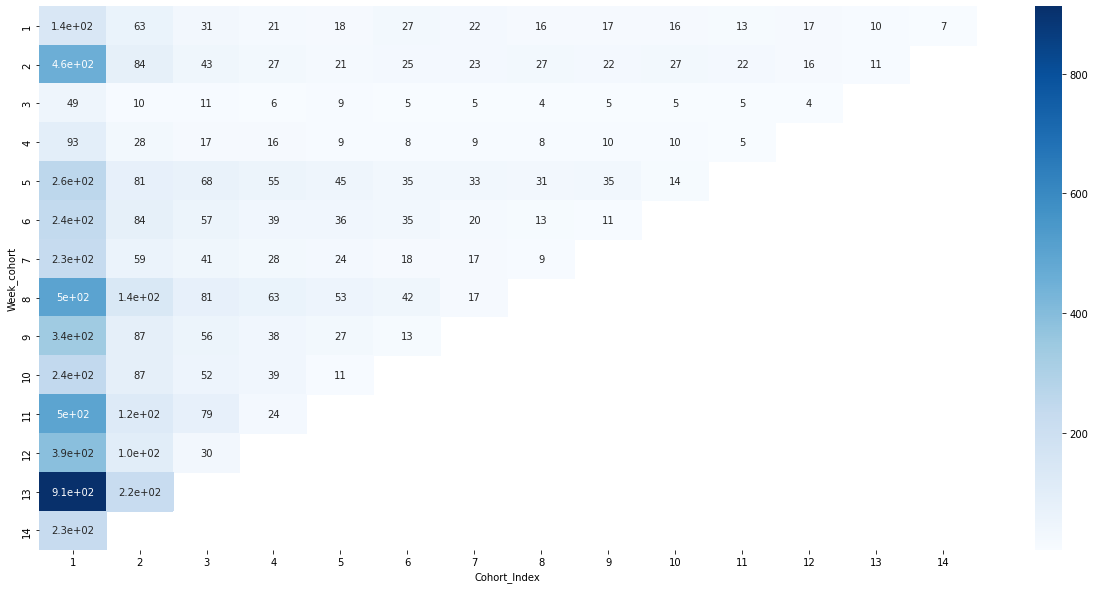

In [ ]:
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table,annot=True,cmap='Blues')

In [ ]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)
new_cohort_table

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Week_cohort,,,,,,,,,,,,,,
1,1.0,0.437500,0.215278,0.145833,0.125000,0.187500,0.152778,0.111111,0.118056,0.111111,0.090278,0.118056,0.069444,0.048611
2,1.0,0.183406,0.093886,0.058952,0.045852,0.054585,0.050218,0.058952,0.048035,0.058952,0.048035,0.034934,0.024017,NaN
3,1.0,0.204082,0.224490,0.122449,0.183673,0.102041,0.102041,0.081633,0.102041,0.102041,0.102041,0.081633,NaN,NaN
4,1.0,0.301075,0.182796,0.172043,0.096774,0.086022,0.096774,0.086022,0.107527,0.107527,0.053763,NaN,NaN,NaN
5,1.0,0.312741,0.262548,0.212355,0.173745,0.135135,0.127413,0.119691,0.135135,0.054054,NaN,NaN,NaN,NaN
6,1.0,0.351464,0.238494,0.163180,0.150628,0.146444,0.083682,0.054393,0.046025,NaN,NaN,NaN,NaN,NaN
7,1.0,0.254310,0.176724,0.120690,0.103448,0.077586,0.073276,0.038793,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,0.277778,0.160714,0.125000,0.105159,0.083333,0.033730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,0.255882,0.164706,0.111765,0.079412,0.038235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


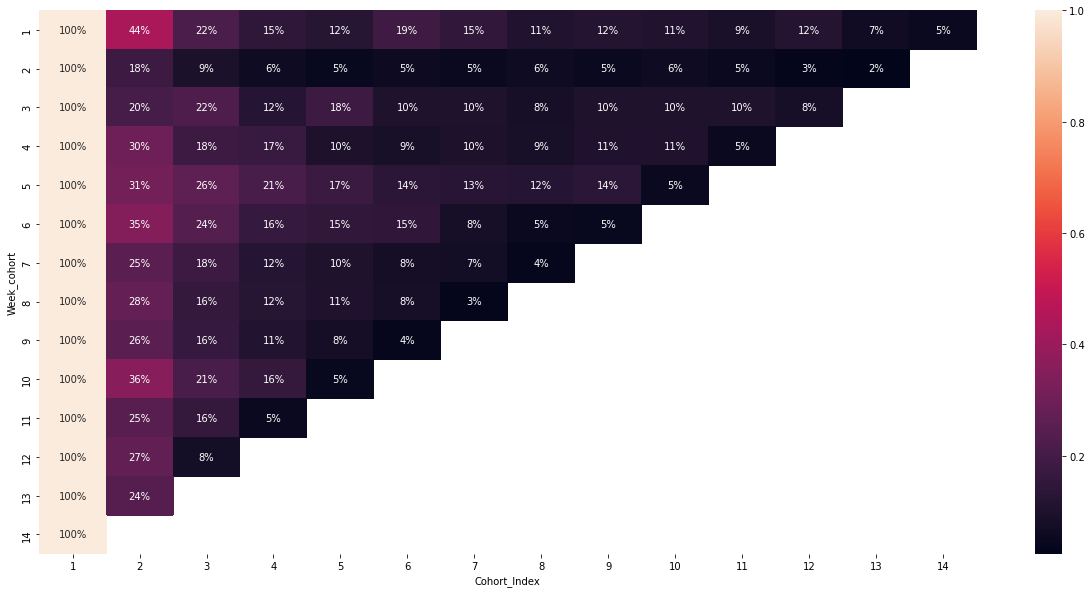

In [ ]:
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table,annot=True,fmt='.0%')

DAU, is the measurement of the number of users who are active on an app or website each day. It is a tool used to measure the success of an online product or website.

In [ ]:
dau = df.groupby(['Activity_Date']).agg(pd.Series.count)['CustomerID']
dau.head(10)

Activity_Date
2020-01-01      2
2020-01-02     29
2020-01-03     42
2020-01-04     27
2020-01-05     91
2020-01-06    115
2020-01-07    129
2020-01-08    132
2020-01-09    163
2020-01-10    164
Name: CustomerID, dtype: int64

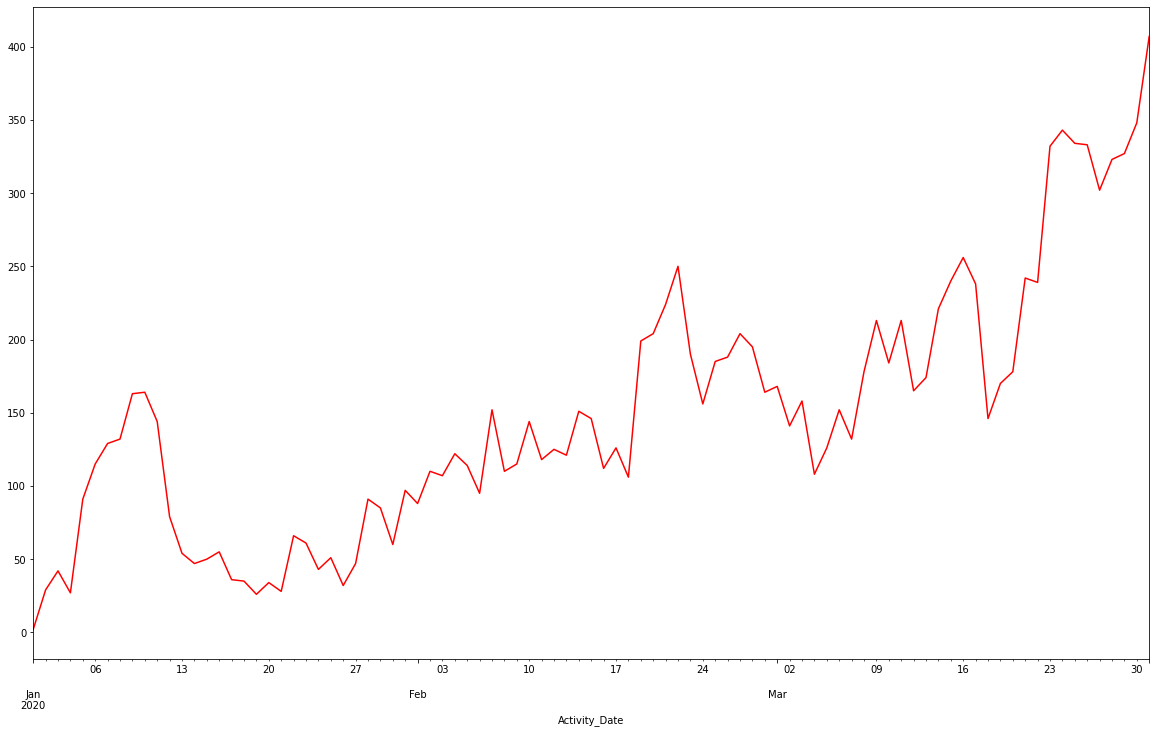

In [ ]:
dau.plot(figsize = (20,12),color = 'red')